In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os


def get_conservation_path(dataset):
    return f'../../../data/features/conservation/{dataset}'
def get_indices_path(dataset):
    return f'../../../data/features/fluctuation/{dataset}/indices'
def get_fluctuation_path(dataset):
    return f'../../../data/features/fluctuation/{dataset}/fluctuation'


In [2]:
def compute_mean_conservation(dataset):
    conservation_path = get_conservation_path(dataset)
    indices_path = get_indices_path(dataset)

    binding = []
    nonbinding = []

    for filename in os.listdir(conservation_path):
        conservation_data = np.load(os.path.join(conservation_path, filename))
        indices = np.load(os.path.join(indices_path, filename))
        
        binding.extend(conservation_data[indices])
        nonbinding.extend(np.delete(conservation_data, indices))
    
    print(f'CONSERVATION - {dataset}:')
    print(f'Mean binding conservation: {np.mean(binding)}')
    print(f'Mean nonbinding conservation: {np.mean(nonbinding)}')
    print()


def load_fluctuation_with_conservation(dataset):
    conservation_path = get_conservation_path(dataset)
    fluctuation_path = get_fluctuation_path(dataset)

    fluctuation_with_conservation = []
    fluctuation_without_conservation = []

    for filename in os.listdir(conservation_path):
        conservation_data = np.load(os.path.join(conservation_path, filename))
        fluctuations = np.load(os.path.join(fluctuation_path, filename)).transpose()

        # loop over the residues
        for residue_idx, residue_fluctuation in enumerate(fluctuations):
            # check which bin the distance of the residue falls into
                if conservation_data[residue_idx] > 0:
                    fluctuation_with_conservation.append(residue_fluctuation)
                else:
                    fluctuation_without_conservation.append(residue_fluctuation)
    
    fluctuation_with_conservation_transposed = []
    fluctuation_without_conservation_transposed = []

    for residues, residues_transposed in zip([fluctuation_with_conservation, fluctuation_without_conservation], [fluctuation_with_conservation_transposed, fluctuation_without_conservation_transposed]):
        # for each residue
        for residue in residues:
            for mode_index, mode_value in enumerate(residue):
                # if the mode is not yet in the bin, add it
                if len(residues_transposed) <= mode_index:
                    residues_transposed.append([])
                # add the residue to the correct mode
                residues_transposed[mode_index].append(mode_value)

    # free memory
    del fluctuation_with_conservation, fluctuation_without_conservation

    for residues_transposed in [fluctuation_with_conservation_transposed, fluctuation_without_conservation_transposed]:
        for i, fluctuation in enumerate(residues_transposed):
            residues_transposed[i] = np.array(fluctuation)

    return fluctuation_with_conservation_transposed, fluctuation_without_conservation_transposed


In [3]:
compute_mean_conservation('rigid-dataset')
compute_mean_conservation('cryptobench-dataset')

CONSERVATION - rigid-dataset:
Mean binding conservation: 1.077733103580318
Mean nonbinding conservation: 0.43956928133666584

CONSERVATION - cryptobench-dataset:
Mean binding conservation: 0.9916145641780066
Mean nonbinding conservation: 0.4281403090914012



Do conserved residues have higher/lower fluctuation?

In [4]:
def print_combined_barchart(fluctuation_with_conservation, fluctuation_without_conservation, legend, title='', lim=None):
    plt.figure(figsize=(12, 6))
    data1 = [np.median(dato) for dato in fluctuation_with_conservation]
    data2 = [np.median(dato) for dato in fluctuation_without_conservation]
    ylim = max(np.max(data1), np.max(data2))
    
    if lim:
        plt.ylim(0, lim)
    else:
        plt.ylim(0, ylim)

    plt.bar(range(0, len(data1)), data1, width=1.0, alpha=0.7, label=legend[0])
    plt.bar(range(0, len(data2)), data2, width=1.0, alpha=0.5, label=legend[1])

    plt.title(title)
       
    plt.xlabel('Mode')
    plt.ylabel('Median Value')
    plt.legend()

    plt.tight_layout()
    plt.show()



In [5]:
fluctuation_with_conservation_cryptobench, fluctuation_without_conservation_cryptobench = load_fluctuation_with_conservation('cryptobench-dataset')
fluctuation_with_conservation_rigid, fluctuation_without_conservation_rigid = load_fluctuation_with_conservation('rigid-dataset')

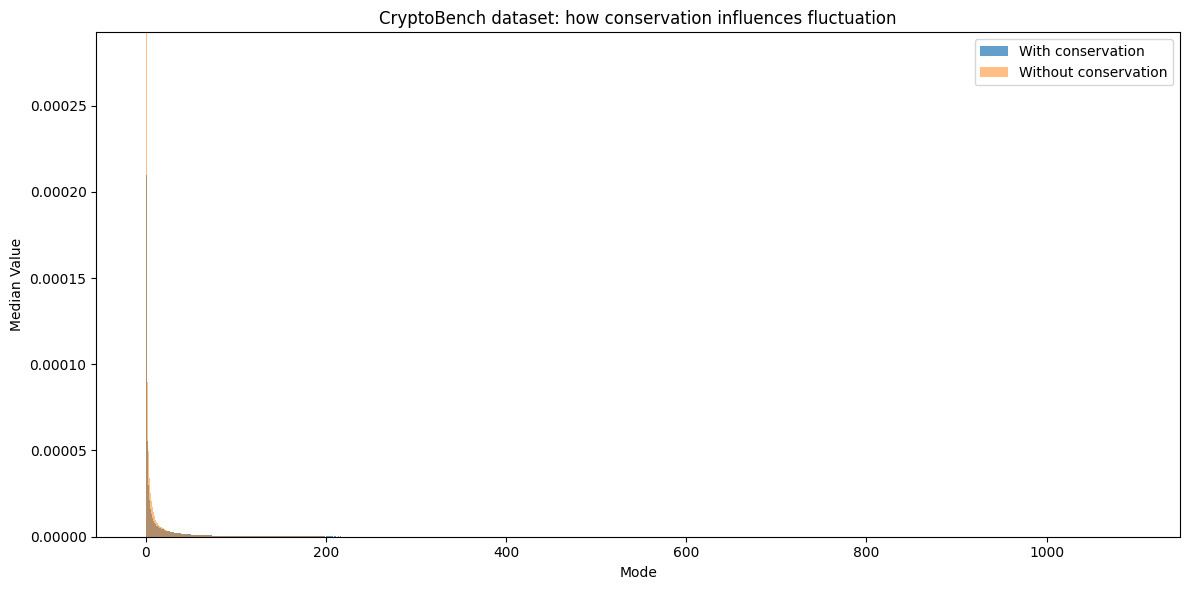

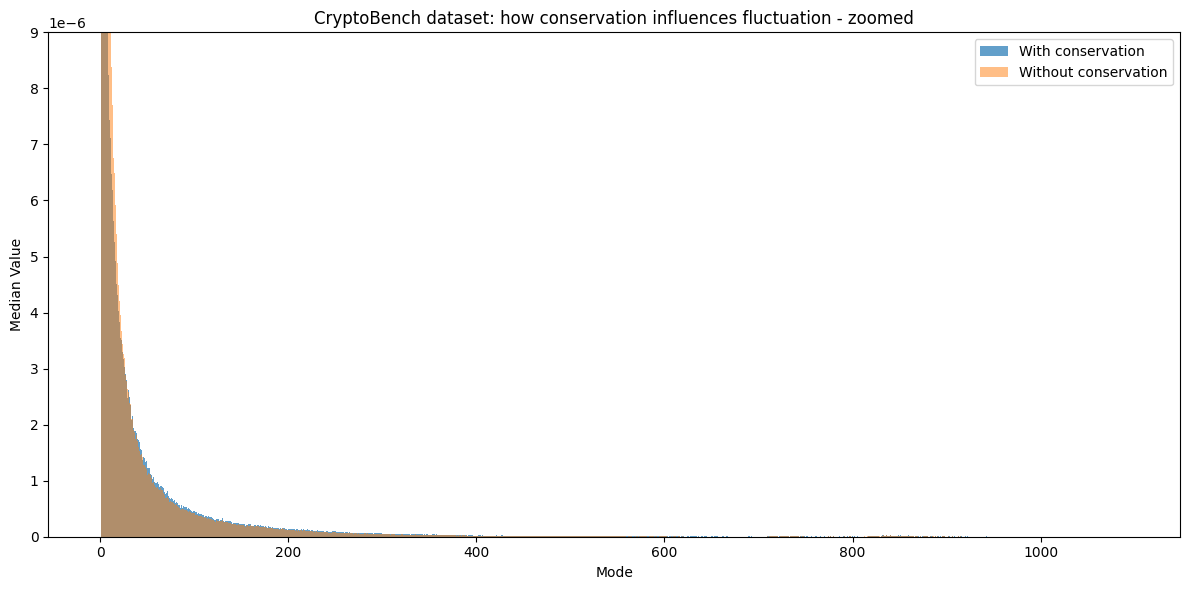

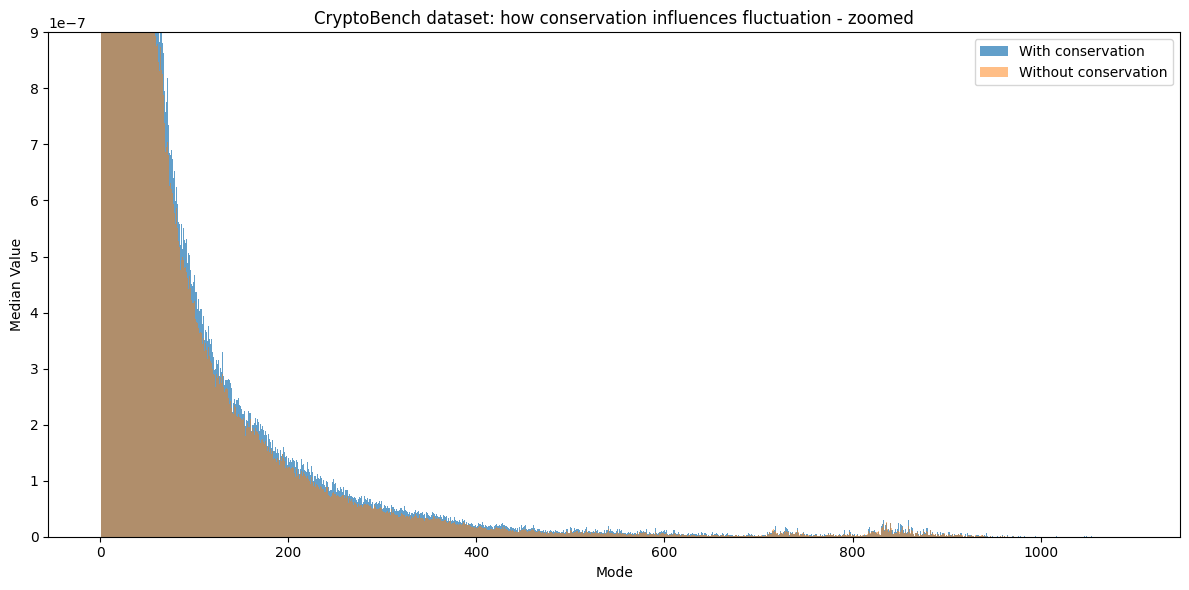

In [6]:
print_combined_barchart(fluctuation_with_conservation_cryptobench, fluctuation_without_conservation_cryptobench, ['With conservation', 'Without conservation'], \
                         'CryptoBench dataset: how conservation influences fluctuation')
print_combined_barchart(fluctuation_with_conservation_cryptobench, fluctuation_without_conservation_cryptobench, ['With conservation', 'Without conservation'], \
                         'CryptoBench dataset: how conservation influences fluctuation - zoomed', lim=9e-06)
print_combined_barchart(fluctuation_with_conservation_cryptobench, fluctuation_without_conservation_cryptobench, ['With conservation', 'Without conservation'], \
                         'CryptoBench dataset: how conservation influences fluctuation - zoomed', lim=9e-07)

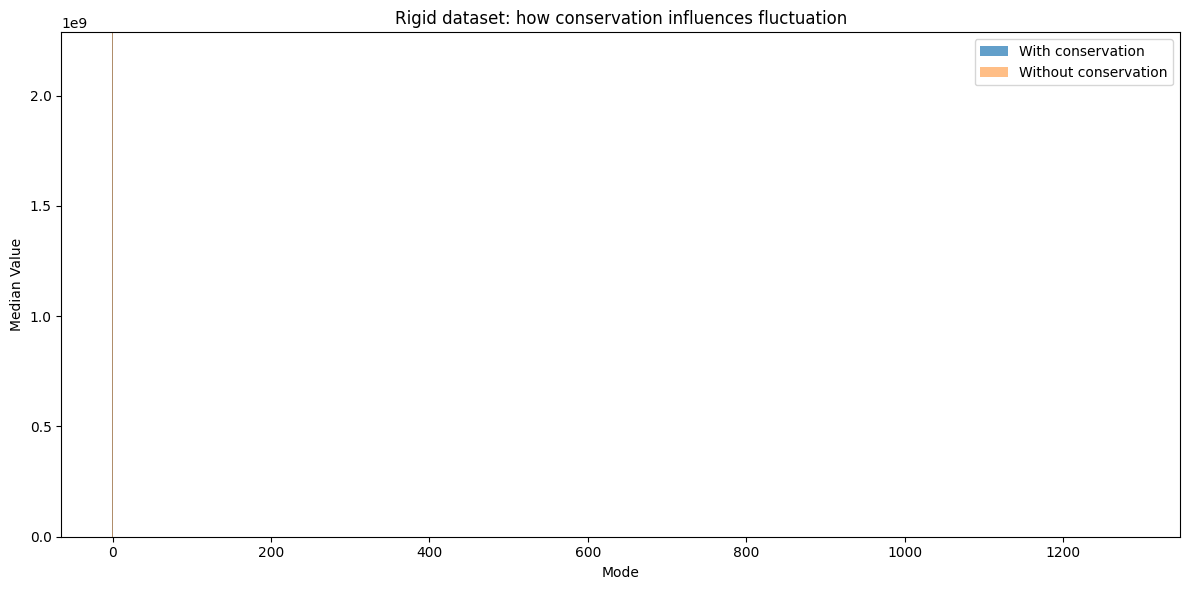

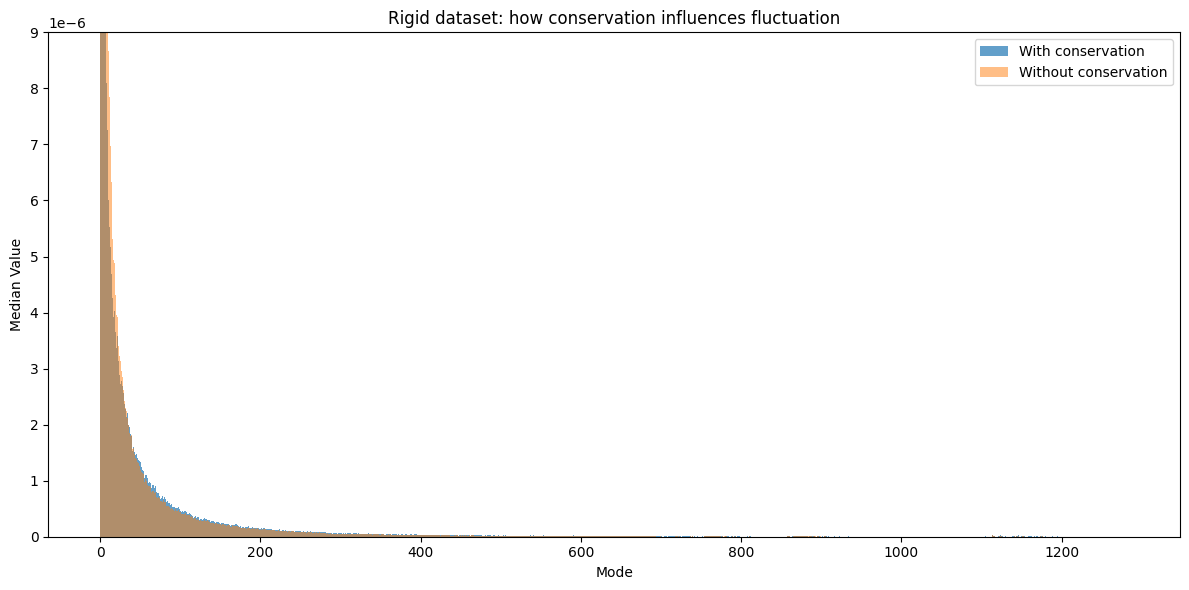

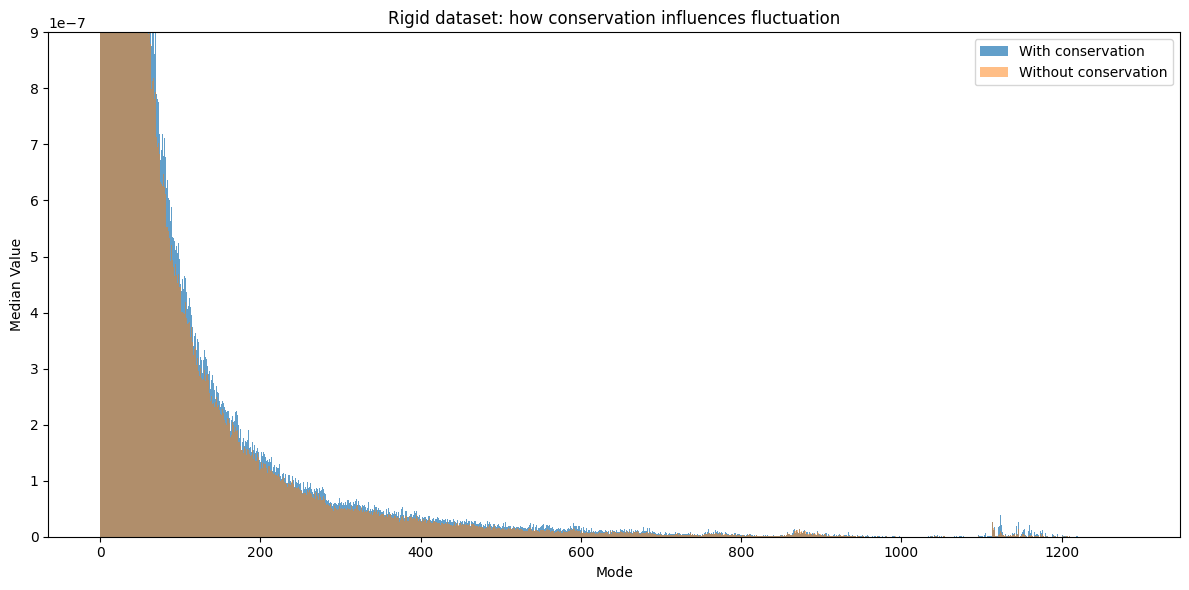

In [7]:
print_combined_barchart(fluctuation_with_conservation_rigid, fluctuation_without_conservation_rigid, ['With conservation', 'Without conservation'], \
                         'Rigid dataset: how conservation influences fluctuation')
print_combined_barchart(fluctuation_with_conservation_rigid, fluctuation_without_conservation_rigid, ['With conservation', 'Without conservation'], \
                         'Rigid dataset: how conservation influences fluctuation', lim=9e-06)
print_combined_barchart(fluctuation_with_conservation_rigid, fluctuation_without_conservation_rigid, ['With conservation', 'Without conservation'], \
                         'Rigid dataset: how conservation influences fluctuation', lim=9e-07)

I don't see a difference between fluctuation of conserved and nonconserved residues, nor any patterns between rigid vs. cryptic 

Let's take a look how diverse are is the fluctuation: (let's show 25th and 75th quantile)

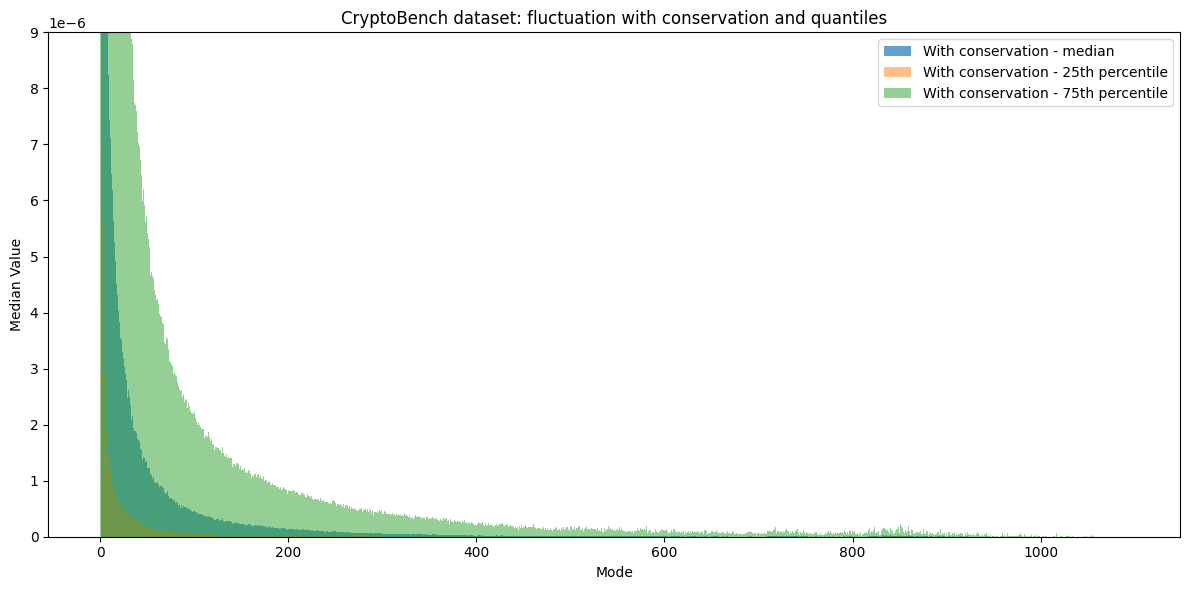

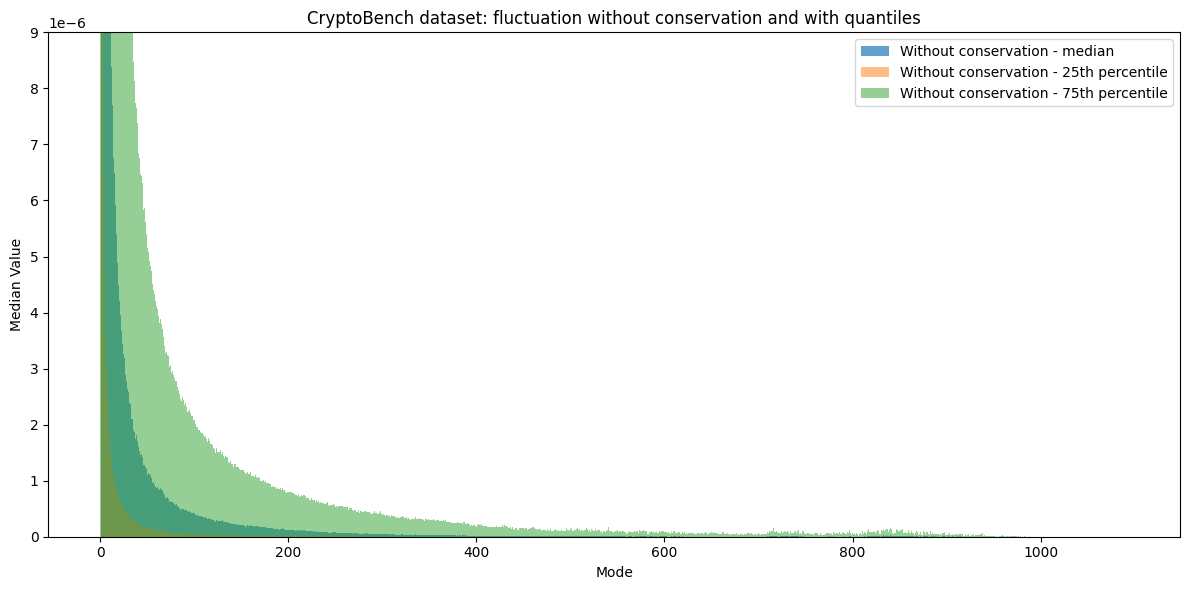

In [8]:
def print_barchart_with_quantiles(fluctuation, legend, title='', lim=None):
    plt.figure(figsize=(12, 6))
    data1 = [np.median(dato) for dato in fluctuation]
    data2 = [np.quantile(dato, 0.25) for dato in fluctuation]
    data3 = [np.quantile(dato, 0.75) for dato in fluctuation]
    ylim = max(np.max(data1), np.max(data2))
    
    if lim:
        plt.ylim(0, lim)
    else:
        plt.ylim(0, ylim)

    plt.bar(range(0, len(data1)), data1, width=1.0, alpha=0.7, label=legend[0])
    plt.bar(range(0, len(data2)), data2, width=1.0, alpha=0.5, label=legend[1])
    plt.bar(range(0, len(data3)), data3, width=1.0, alpha=0.5, label=legend[2])

    plt.title(title)
       
    plt.xlabel('Mode')
    plt.ylabel('Median Value')
    plt.legend()

    plt.tight_layout()
    plt.show()

print_barchart_with_quantiles(fluctuation_with_conservation_cryptobench, ['With conservation - median', 'With conservation - 25th percentile', 'With conservation - 75th percentile'], 'CryptoBench dataset: fluctuation with conservation and quantiles', lim=9e-06)
print_barchart_with_quantiles(fluctuation_without_conservation_cryptobench, ['Without conservation - median', 'Without conservation - 25th percentile', 'Without conservation - 75th percentile'], 'CryptoBench dataset: fluctuation without conservation and with quantiles', lim=9e-06)

Still no visible difference ...